In [43]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score

# One successful example for k-means

In [111]:
sample_df = pd.read_csv("curves2.csv")

training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]

max = 0

for a in range(2, 50):
    kmeans = KMeans(n_clusters=a).fit(training_points)
    arc = adjusted_rand_score(training_labels, kmeans.labels_)

    if max < arc:
        max = arc
        result_a = a

print(result_a)
print(max)

40
1.0


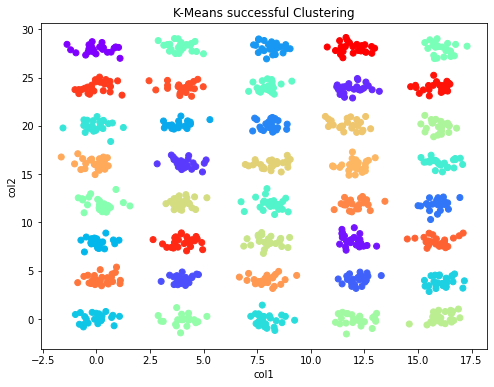

In [112]:
# K-Means 클러스터링
kmeans = KMeans(n_clusters=result_a).fit(training_points)

# 데이터 시각화
plt.figure(figsize=(8, 6))

plt.scatter(training_points["col1"], training_points["col2"], c=kmeans.labels_, cmap='rainbow')

plt.xlabel('col1')
plt.ylabel('col2')
plt.title('K-Means successful Clustering')
plt.show()

# One unsuccessful example for k-means

In [114]:
sample_df = pd.read_csv("disk-5000.csv")

training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]

max = 0

for a in range(1, 10):
    kmeans = KMeans(n_clusters=a).fit(training_points)
    arc = adjusted_rand_score(training_labels, kmeans.labels_)

    if max < arc:
        max = arc
        result_a = a
        
print(result_a)
print(max)

7
0.08369962231269447


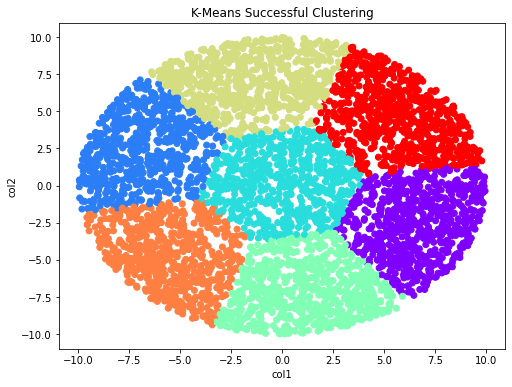

In [107]:
# K-Means 클러스터링
kmeans = KMeans(n_clusters=result_a, random_state=result_b).fit(training_points)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# 데이터 시각화
plt.figure(figsize=(8, 6))

plt.scatter(training_points["col1"], training_points["col2"], c=kmeans.labels_, cmap='rainbow')

plt.xlabel('col1')
plt.ylabel('col2')
plt.title('K-Means Successful Clustering')
plt.show()

# One successful example for hierarchical clustering

In [95]:
from sklearn.cluster import AgglomerativeClustering

sample_df = pd.read_csv("diamond9.csv")

training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]

max = 0

for a in range(2, 50):
    agglo = AgglomerativeClustering(n_clusters=a, linkage="complete").fit(training_points)
    arc = adjusted_rand_score(training_labels, agglo.labels_)

    if max < arc:
        max = arc
        result_a = a
        
print(result_a)
print(max)

9
0.9992487486263847


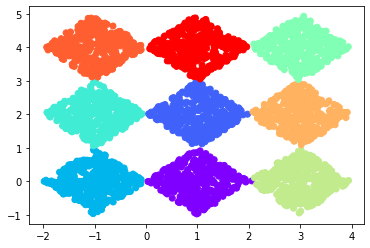

In [92]:
agglo = AgglomerativeClustering(n_clusters=result_a, linkage="complete").fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=agglo.labels_, cmap='rainbow')

plt.show()

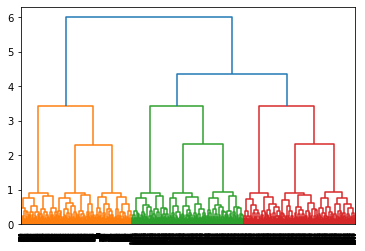

In [93]:
import scipy.cluster.hierarchy as shc

dend=shc.dendrogram(shc.linkage(sample_df, method='average'))

# One unsuccessful example for hierarchical clustering

In [99]:
sample_df = pd.read_csv("spiral.csv")

training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]

max = 0

for a in range(2, 50):
    agglo = AgglomerativeClustering(n_clusters=a, linkage="complete").fit(training_points)
    arc = adjusted_rand_score(training_labels, agglo.labels_)

    if max < arc:
        max = arc
        result_a = a
        
print(result_a)
print(max)

19
0.5882540412684218


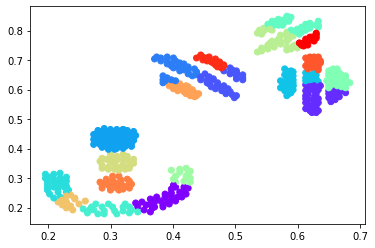

In [100]:
agglo = AgglomerativeClustering(n_clusters=result_a, linkage="complete").fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=agglo.labels_, cmap='rainbow')

plt.show()

# One successful example for dbscan

In [121]:
sample_df = pd.read_csv("spiral.csv")

training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]

max = 0

for a in range(1, 100):
    for b in range(1, 200):
        dbscan = DBSCAN(eps = 0.01*a, min_samples=b).fit(training_points)
        arc = adjusted_rand_score(training_labels, dbscan.labels_)
        
        if max < arc:
            max = arc
            result_a = a
            result_b = b
            
print(result_a, result_b)
print(max)

2 1
0.8222727879132911


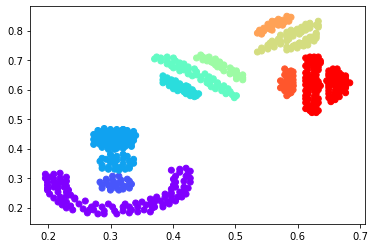

In [122]:
dbscan = DBSCAN(eps = 0.01*2, min_samples=1).fit(training_points)
arc = adjusted_rand_score(training_labels, dbscan.labels_)

plt.scatter(training_points["col1"], training_points["col2"], c=dbscan.labels_, cmap='rainbow')

plt.show()